In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('spaceship_titanic.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [122]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [123]:
for column_name in ['HomePlanet', 'Cabin', 'Destination']:
    frequent_pl = df[column_name].value_counts().head(1).index[0]
    df[column_name].fillna(frequent_pl, inplace=True)

C:\Users\artem\AppData\Local\Temp\ipykernel_39116\581523995.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(frequent_pl, inplace=True)
C:\Users\artem\AppData\Local\Temp\ipykernel_39116\581523995.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [124]:
for name in ['Age', 'CryoSleep', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df[name].fillna(df[name].median(), inplace=True)

C:\Users\artem\AppData\Local\Temp\ipykernel_39116\766222591.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[name].fillna(df[name].median(), inplace=True)
C:\Users\artem\AppData\Local\Temp\ipykernel_39116\766222591.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [125]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [126]:
hashmap_cat = {}
for col in ['HomePlanet', 'Cabin', 'Destination']:
    for i, val in enumerate(pd.unique(df[col])):
        hashmap_cat[val] = i

print(hashmap_cat)

for col in ['HomePlanet', 'Cabin', 'Destination']:
    for val in pd.unique(df[col]):
        df[col].replace(val, hashmap_cat[val], inplace=True)

C:\Users\artem\AppData\Local\Temp\ipykernel_39116\3514029505.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace(val, hashmap_cat[val], inplace=True)


{'Europa': 0, 'Earth': 1, 'Mars': 2, 'B/0/P': 0, 'F/0/S': 1, 'A/0/S': 2, 'F/1/S': 3, 'F/0/P': 4, 'F/2/S': 5, 'G/0/S': 6, 'F/3/S': 7, 'B/1/P': 8, 'F/1/P': 9, 'G/1/S': 10, 'F/2/P': 11, 'G/734/S': 12, 'F/3/P': 13, 'F/4/P': 14, 'F/5/P': 15, 'G/0/P': 16, 'F/6/P': 17, 'E/0/S': 18, 'D/0/P': 19, 'C/2/S': 20, 'F/6/S': 21, 'C/0/P': 22, 'F/8/P': 23, 'G/4/S': 24, 'F/9/P': 25, 'D/1/S': 26, 'D/1/P': 27, 'F/8/S': 28, 'F/10/S': 29, 'G/1/P': 30, 'G/2/P': 31, 'B/3/P': 32, 'G/3/P': 33, 'F/10/P': 34, 'E/1/S': 35, 'E/2/S': 36, 'G/6/S': 37, 'F/11/S': 38, 'A/1/S': 39, 'G/7/S': 40, 'F/12/S': 41, 'F/13/S': 42, 'F/14/S': 43, 'E/3/S': 44, 'G/6/P': 45, 'G/10/S': 46, 'F/15/S': 47, 'E/4/S': 48, 'F/16/S': 49, 'F/13/P': 50, 'F/14/P': 51, 'F/17/S': 52, 'D/3/P': 53, 'C/3/S': 54, 'F/18/S': 55, 'F/15/P': 56, 'C/4/S': 57, 'G/13/S': 58, 'F/16/P': 59, 'G/14/S': 60, 'C/5/S': 61, 'F/17/P': 62, 'E/5/S': 63, 'G/15/S': 64, 'G/16/S': 65, 'F/20/S': 66, 'G/9/P': 67, 'A/2/S': 68, 'G/11/P': 69, 'F/19/P': 70, 'G/12/P': 71, 'F/23/S': 7

<Axes: >

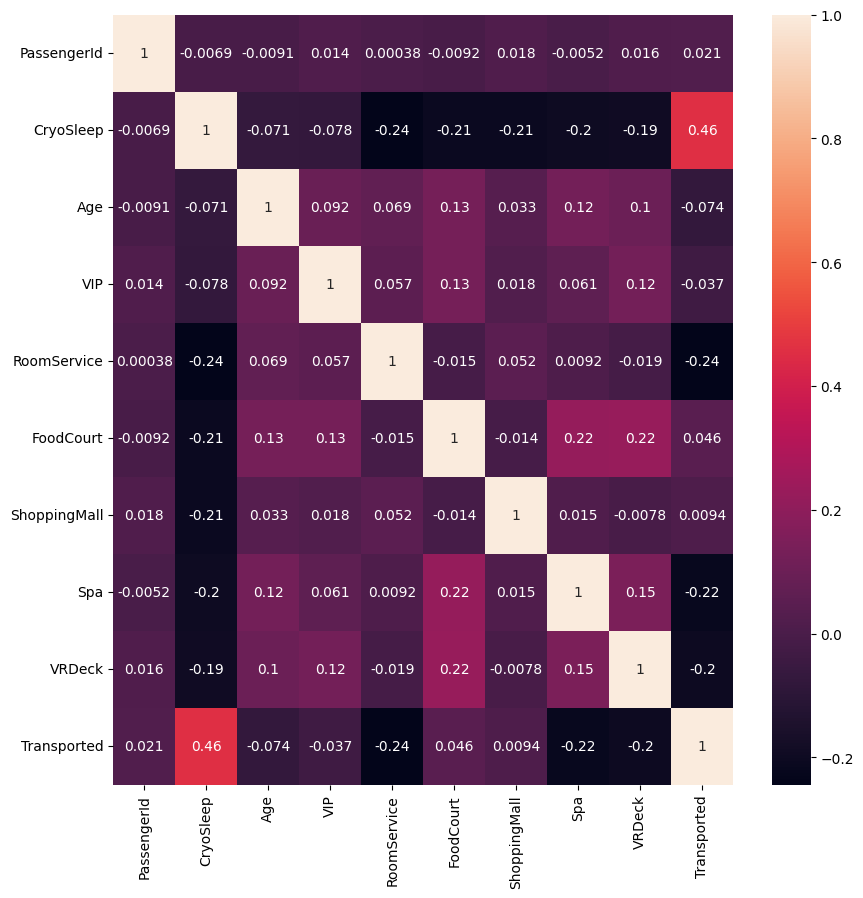

In [127]:
sdf = df.drop(columns=['Name', 'HomePlanet', 'Destination', 'Cabin'], axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(sdf.corr(), 
        xticklabels=sdf.corr().columns,
        yticklabels=sdf.corr().columns, 
        annot=True)